In [9]:
import pandas as pd

df = pd.read_csv('data/binary_data.csv')
# df = df[2800000:4200000]

In [10]:
df

,ids,autobiography,bibliography,biography,case-control_studies,case_reports,clinical_conference,clinical_studies_as_topic,clinical_study,clinical_trial,...,retraction_of_publication,retrospective_studies,review,scientific_integrity_review,systematic_review,systematic_reviews_as_topic,twin_study,validation_study,veterinary_clinical_trial,veterinary_randomized_controlled_trial
0,9868216,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
1,9358420,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
2,10553438,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
3,31785634,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
4,28538805,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9572361,9474670,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9572362,23685058,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9572363,18985570,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9572364,15682490,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
import pandas as pd
import requests
import xml.etree.ElementTree as ET
from time import sleep
from tqdm import tqdm  # ✅ 加入 tqdm 進度條

# API 基本設定
API_URL = "https://www.ncbi.nlm.nih.gov/pmc/utils/idconv/v1.0/"  # 實際 endpoint
TOOL = "fulltext_labeling"  # 替換成你的 tool 名稱
EMAIL = "yuhsinl2@illinois.edu"  # 替換成你的 email

# 轉為字串清單
all_ids = df['ids'].astype(str).tolist()

# 記錄 id 對應的 pmcid
id_to_pmcid = {}

# 分批處理，每批最多 200 個
batch_size = 200
for i in tqdm(range(0, len(all_ids), batch_size), desc="Processing batches"):
    
    batch_ids = all_ids[i:i + batch_size]
    ids_param = ",".join(batch_ids)

    params = {
        "tool": TOOL,
        "email": EMAIL,
        "ids": ids_param
    }

    response = requests.get(API_URL, params=params)

    if response.status_code == 200:
        root = ET.fromstring(response.text)
        for record in root.findall(".//record"):
            requested_id = record.get("requested-id")
            pmcid = record.get("pmcid")
            id_to_pmcid[requested_id] = pmcid
    else:
        print(f"Error on batch {i // batch_size + 1}: {response.status_code}")

    # 避免 API rate limit
    sleep(1)

# 新增 PMCID 欄位
df['ids_str'] = [str(i) for i in df['ids']]
df['PMCID'] = df['ids_str'].map(id_to_pmcid)

# 儲存結果
# df.to_csv('data/with_pmcid.csv', index=False)
df


Processing batches:  85%|████████▌ | 5963/7000 [1:54:59<19:06,  1.11s/it]  IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [3]:
df = df[df['PMCID'].notnull()]
len(df)

349247

In [4]:
df.to_csv('data/with_pmcid3.csv', index=False)

In [1]:
import pandas as pd

df = pd.read_csv('data/with_pmcid3.csv')
df

,ids,autobiography,bibliography,biography,case-control_studies,case_reports,clinical_conference,clinical_studies_as_topic,clinical_study,clinical_trial,...,review,scientific_integrity_review,systematic_review,systematic_reviews_as_topic,twin_study,validation_study,veterinary_clinical_trial,veterinary_randomized_controlled_trial,ids_str,PMCID
0,23988518,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,23988518,PMC3878305
1,19922489,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,19922489,PMC6496263
2,28316999,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,28316999,PMC5337874
3,23001988,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,23001988,PMC3536347
4,37153792,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,37153792,PMC10157642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349242,28535290,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,28535290,PMC5860470
349243,27100449,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,27100449,PMC4845853
349244,24150489,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,24150489,PMC3952677
349245,34353470,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,34353470,PMC8359728


每個 label 出現的次數：
review                                2592781
case_reports                          1643476
clinical_study                         860675
retrospective_studies                  781411
letter                                 766141
clinical_trial                         734977
follow-up_studies                      517926
prospective_studies                    503587
comment                                502102
randomized_controlled_trial_humans     447321
editorial                              438112
reproducibility_of_results             357303
cross-sectional_studies                305569
clinical_studies_as_topic              286883
multicenter_study                      285506
clinical_trials_as_topic               282166
systematic_review                      269984
case-control_studies                   258157
evaluation_study                       237095
cohort_studies                         232435
historical_article                     209196
predictive_value_o

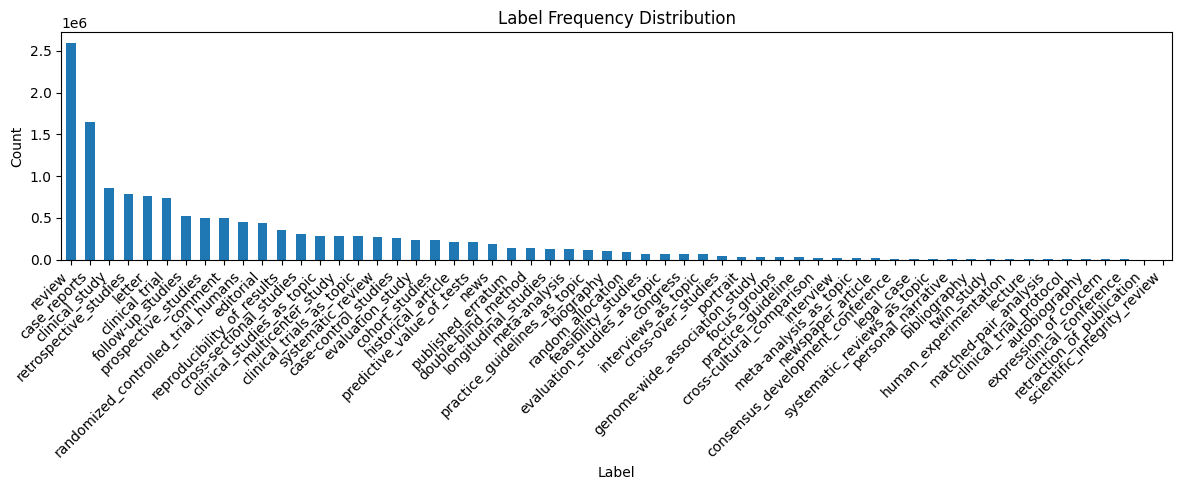

count    9.572366e+06
mean     1.496521e+00
std      9.142895e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.000000e+01
Name: num_labels, dtype: float64


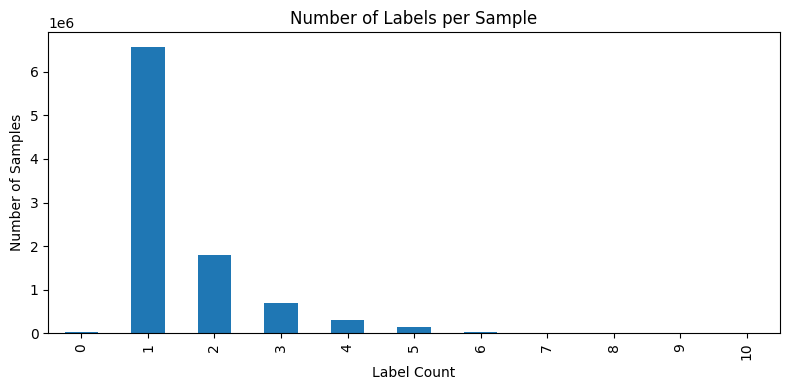

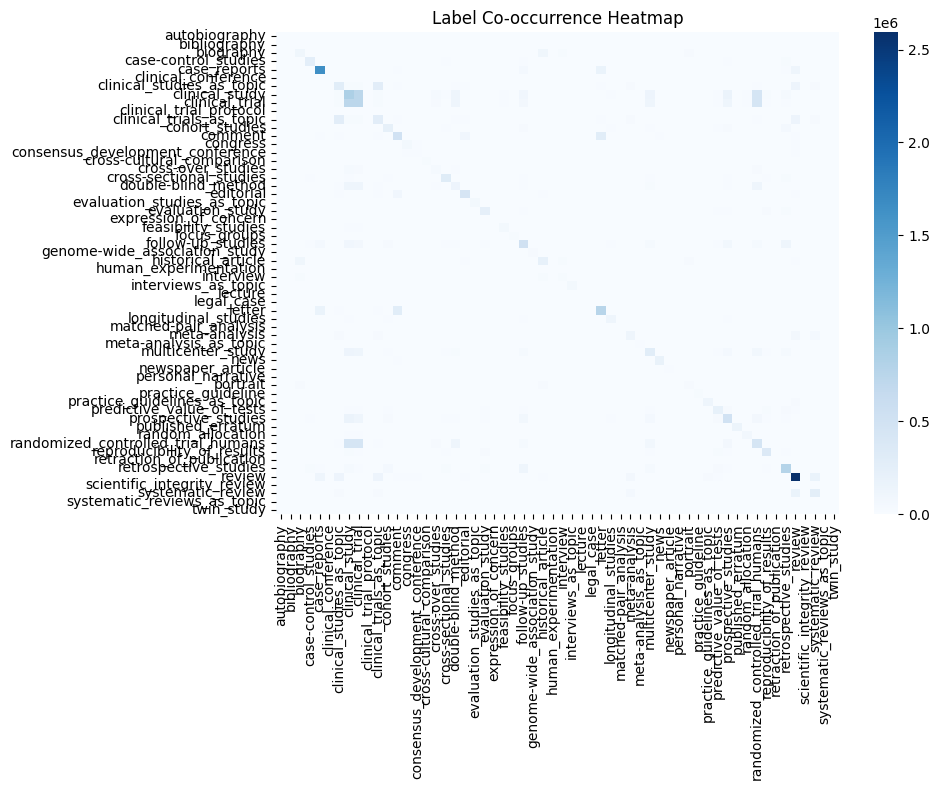

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 假設第一欄是 ids，剩下的是 one-hot labels
label_cols = df.columns[1:-3]  # 你可以調整這個 index，如果 label 欄位不是從第 1 欄開始

# === Step 2: 計算每個 label 的出現次數 ===
label_counts = df[label_cols].sum().sort_values(ascending=False)

# 顯示結果
print("每個 label 出現的次數：")
print(label_counts)

# === Step 3: 視覺化 label 分布 ===
plt.figure(figsize=(12, 5))
label_counts.plot(kind='bar')
plt.title("Label Frequency Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# === Step 4: 每筆資料擁有幾個 label ===
df['num_labels'] = df[label_cols].sum(axis=1)

# 顯示基本統計
print(df['num_labels'].describe())

# 視覺化
plt.figure(figsize=(8, 4))
df['num_labels'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Labels per Sample")
plt.xlabel("Label Count")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()

# === Step 5: Label Co-occurrence Matrix (可選) ===
co_occur = df[label_cols].T.dot(df[label_cols])
plt.figure(figsize=(10, 8))
sns.heatmap(co_occur, cmap='Blues', xticklabels=True, yticklabels=True)
plt.title("Label Co-occurrence Heatmap")
plt.tight_layout()
plt.show()


In [5]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [6]:
import json

data = []
with open("data/train.txt", "r") as f:
    for line in f:
        data.append(json.loads(line))

print(data[0]['article_id'])
print(data[0]['article_text'][:2])


PMC3872579
['a recent systematic analysis showed that in 2011 , 314 ( 296 - 331 ) million children younger than 5 years were mildly , moderately or severely stunted and 258 ( 240 - 274 ) million were mildly , moderately or severely underweight in the developing countries .', 'in iran a study among 752 high school girls in sistan and baluchestan showed prevalence of 16.2% , 8.6% and 1.5% , for underweight , overweight and obesity , respectively .']


In [7]:
import pandas as pd
df2 = pd.DataFrame(data)
df2

,article_id,article_text,abstract_text,labels,section_names,sections
0,PMC3872579,[a recent systematic analysis showed that in 2...,[<S> background : the present study was carrie...,None,"[INTRODUCTION, MATERIALS AND METHODS, Particip...",[[a recent systematic analysis showed that in ...
1,PMC3770628,[it occurs in more than 50% of patients and ma...,[<S> backgroundanemia in patients with cancer ...,None,"[Introduction, Patients and methods, Study des...",[[it occurs in more than 50% of patients and m...
2,PMC5330001,"[tardive dystonia ( td ) , a rarer side effect...",[<S> tardive dystonia ( td ) is a serious side...,None,"[INTRODUCTION, CASE REPORT, DISCUSSION, Declar...","[[tardive dystonia ( td ) , a rarer side effec..."
3,PMC4386667,"[lepidoptera include agricultural pests that ,...",[<S> many lepidopteran insects are agricultura...,None,"[1. Introduction, 2. Insect Immunity, 3. Signa...",[[lepidoptera include agricultural pests that ...
4,PMC4307954,[syncope is caused by transient diffuse cerebr...,[<S> we present an unusual case of recurrent c...,None,"[Introduction, Case report, Discussion, Confli...",[[syncope is caused by transient diffuse cereb...
...,...,...,...,...,...,...
119919,PMC3502213,[eukaryotic cells depend on vesicle - mediated...,[<S> long - distance trafficking of membranous...,None,"[Introduction, Motor-Dependent Transport of Ra...",[[eukaryotic cells depend on vesicle - mediate...
119920,PMC3198562,[as regards the selection criteria of the post...,[<S> aims and objectives : to study the stress...,None,"[INTRODUCTION, MATERIALS AND METHODS, Modeling...",[[fiber post systems are routinely used in res...
119921,PMC4436536,[in most of the peer review publications in th...,[<S> abstractbackgroundthe objective of this s...,None,"[Introduction, Methods, Results, Discussion, L...",[[in most of the peer review publications in t...
119922,PMC4251613,[the reveal registry is a longitudinal registr...,[<S> background : patients with pulmonary arte...,None,"[TRIAL REGISTRY:, Materials and Methods, REVEA...","[[], [the reveal registry is a longitudinal re..."


In [8]:
merged_df = pd.merge(df, df2, how='inner', left_on='PMCID', right_on='article_id')
merged_df

,ids,autobiography,bibliography,biography,case-control_studies,case_reports,clinical_conference,clinical_studies_as_topic,clinical_study,clinical_trial,...,veterinary_clinical_trial,veterinary_randomized_controlled_trial,ids_str,PMCID,article_id,article_text,abstract_text,labels,section_names,sections
0,27669825,0,0,0,0,0,0,0,0,0,...,0,0,27669825,PMC5050529,PMC5050529,[reversible protein phosphorylation is the pri...,[<S> almost all eukaryotic proteins are subjec...,None,"[INTRODUCTION, COMPOSITION OF MITOTIC PHOSPHAT...",[[reversible protein phosphorylation is the pr...
1,24288443,0,0,0,0,0,0,0,0,0,...,0,0,24288443,PMC3833358,PMC3833358,[the number of mitochondria a cell contains de...,[<S> diabetic cardiomyopathy is initiated by a...,None,"[1. ROS Balance in the Diabetic Cardiac Cell, ...",[[the number of mitochondria a cell contains d...
2,27905332,0,0,0,0,0,0,0,0,0,...,0,0,27905332,PMC5168911,PMC5168911,[the study was classified as nonhuman subject ...,[<S> purpose : to determine the publication ra...,None,"[Methods, Results, Discussion, Financial suppo...",[[the study was classified as nonhuman subject...
3,27833731,0,0,0,0,0,0,0,0,0,...,0,0,27833731,PMC5100646,PMC5100646,[bone homeostasis is set up on a continuous re...,[<S> abstractobjectivesthe present manuscript ...,None,"[INTRODUCTION, BONE TISSUE, BONE CELLS: DIFFER...",[[bone homeostasis is set up on a continuous r...
4,17942423,0,0,0,0,0,0,0,0,0,...,0,0,17942423,PMC2190719,PMC2190719,"[more than 70 years ago , mccay and his collea...",[<S> caloric restriction ( cr ) reduces the in...,None,"[INTRODUCTION, Caloric restriction and genomic...","[[more than 70 years ago , mccay and his colle..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4630,27680880,0,0,0,0,0,0,0,0,0,...,0,0,27680880,PMC5216196,PMC5216196,[warfarin and other vitamin k antagonists are ...,[<S> aimswe aimed to evaluate bleeding risk in...,None,"[Introduction, Methods, Data sources, Study po...",[[warfarin and other vitamin k antagonists are...
4631,25620306,0,0,0,0,0,0,0,0,0,...,0,0,25620306,PMC4852976,PMC4852976,[to estimate teen and early adolescent pregnan...,[<S> purposeto examine pregnancy rates and out...,None,"[Methods, Countries with incomplete statistics...",[[to estimate teen and early adolescent pregna...
4632,25405013,0,0,0,0,0,0,0,0,0,...,0,0,25405013,PMC4231148,PMC4231148,"[in the united states , prostate cancer ( pca ...",[<S> purposethe aim of this study was to inves...,None,"[INTRODUCTION, MATERIALS AND METHODS, RESULTS,...","[[in the united states , prostate cancer ( pca..."
4633,19380290,0,0,0,0,0,0,0,0,0,...,0,0,19380290,PMC3401007,PMC3401007,[one area of psychology analyzes subjective we...,[<S> objectivewe intended to determine the rel...,None,"[Background, Methods, Participants, Demographi...",[[one area of psychology analyzes subjective w...


In [9]:
merged_df.to_csv('data/merged_df3.csv', index=False)

In [10]:
merged_df['sections'][0]

[['reversible protein phosphorylation is the primary type of post - translational modification in eukaryotic cell division and cell cycle .',
  'dynamic changes in phosphorylation state of many cell cycle - mediated proteins regulate their molecular and cellular fates , and aberrant protein phosphorylation can contribute to many pathological conditions and diseases .',
  'in fact , more than 70% of all cellular proteins are regulated by phosphorylation ( dephoure et al . , 2008 ; macek et al . , 2009 ; olsen et al . , 2006 ; 2010 ) .',
  'in addition , through the human genome analyses , a recent report indicated that 518 kinases are either tyrosine ( tyr ) kinases or serine / threonine ( ser / thr ) kinases ( johnson and hunter , 2005 ; manning et al . ,',
  '2002 ) , whereas the total number of tyr phosphatases and ser / thr phosphatases is approximately 137 , much fewer than the number of aforementioned kinases ( brautigan , 2013 ; tonks , 2006 ) .',
  'there are around 107 tyr phos